In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('video_games_sales.csv')

In [3]:
import warnings

In [4]:
warnings.simplefilter('ignore')


In [5]:
%matplotlib inline


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
%config InlineBackend.figure_format = 'svg'

In [8]:
from pylab import rcParams


In [9]:
rcParams['figure.figsize'] = 8, 5

In [10]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [11]:
import plotly

In [12]:
import plotly.graph_objs as go

In [13]:
init_notebook_mode(connected=True)


In [23]:
years_df  = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count())

In [25]:
years_df.columns = ['Global_Sales', 'Number_of_Games']

In [28]:
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

In [29]:
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

In [39]:
data = [trace0, trace1]

In [40]:
layout = {'title': 'Statistics of video games'}


In [41]:
fig = go.Figure(data=data, layout=layout)


In [42]:
iplot(fig, show_link=False)

In [43]:
plotly.offline.plot(fig, filename='years_stats.html', show_link=False)

'years_stats.html'

In [53]:
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)

In [54]:
platforms_df.columns = ['Global_Sales', 'Number_of_Games']

In [55]:
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

In [57]:
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales'
)

In [58]:
trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released'
)

In [59]:
data = [trace0, trace1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platform'}}


In [60]:
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [61]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [62]:
data = []
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, name=genre)
    )

In [65]:
iplot(data, show_link = False)

In [66]:
df = pd.read_csv('telecom_churn.csv')

In [67]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [68]:
df.shape

(3333, 20)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


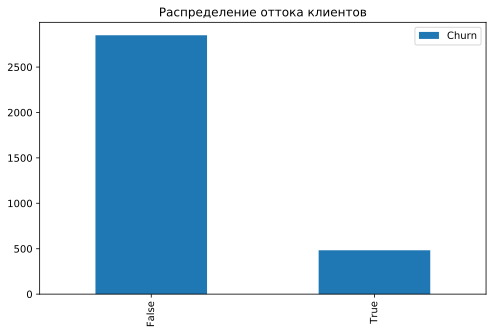

In [82]:
df['Churn'].value_counts().plot(kind = 'bar', label = 'Churn')
plt.legend()
plt.title('Распределение оттока клиентов');

In [86]:
corr_matrix = df.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code'], axis=1).corr()

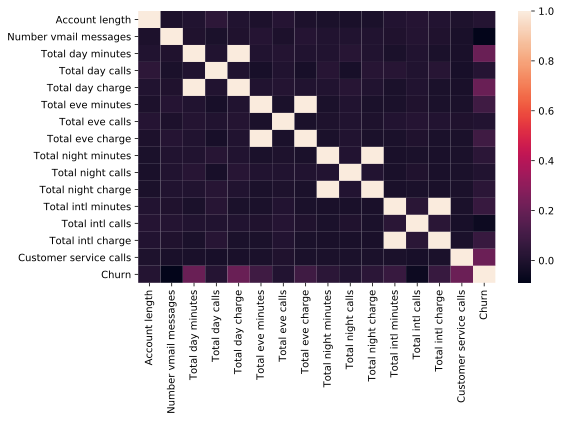

In [87]:
sns.heatmap(corr_matrix);

In [88]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))

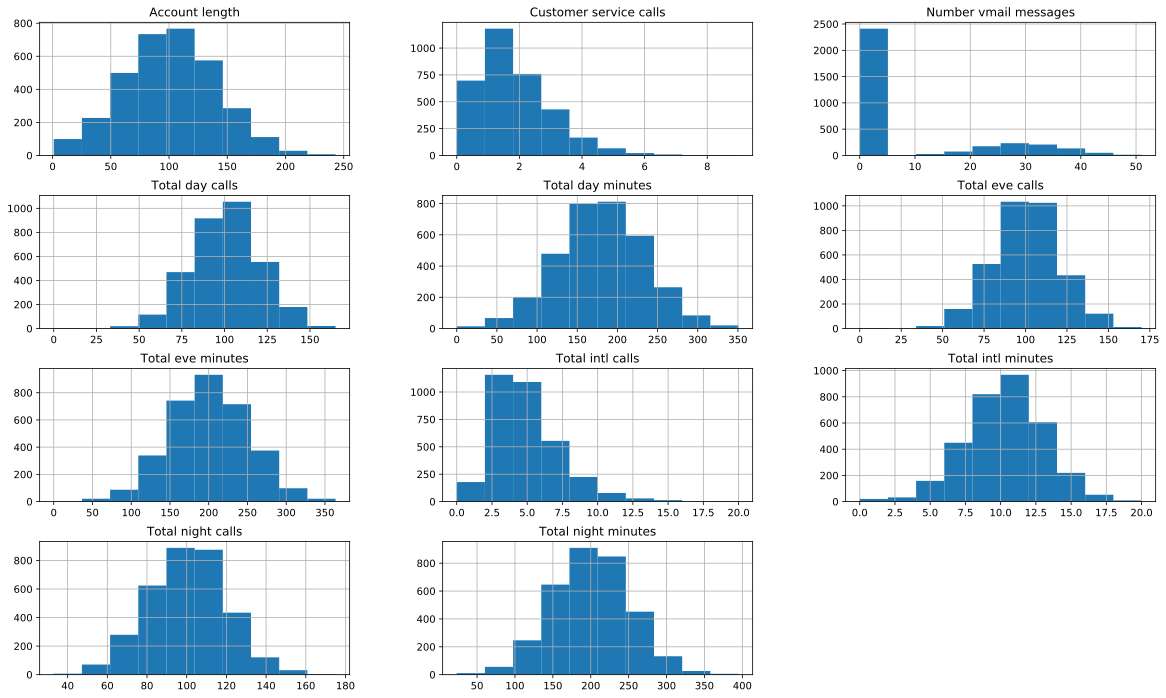

In [89]:
df[features].hist(figsize=(20,12));


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

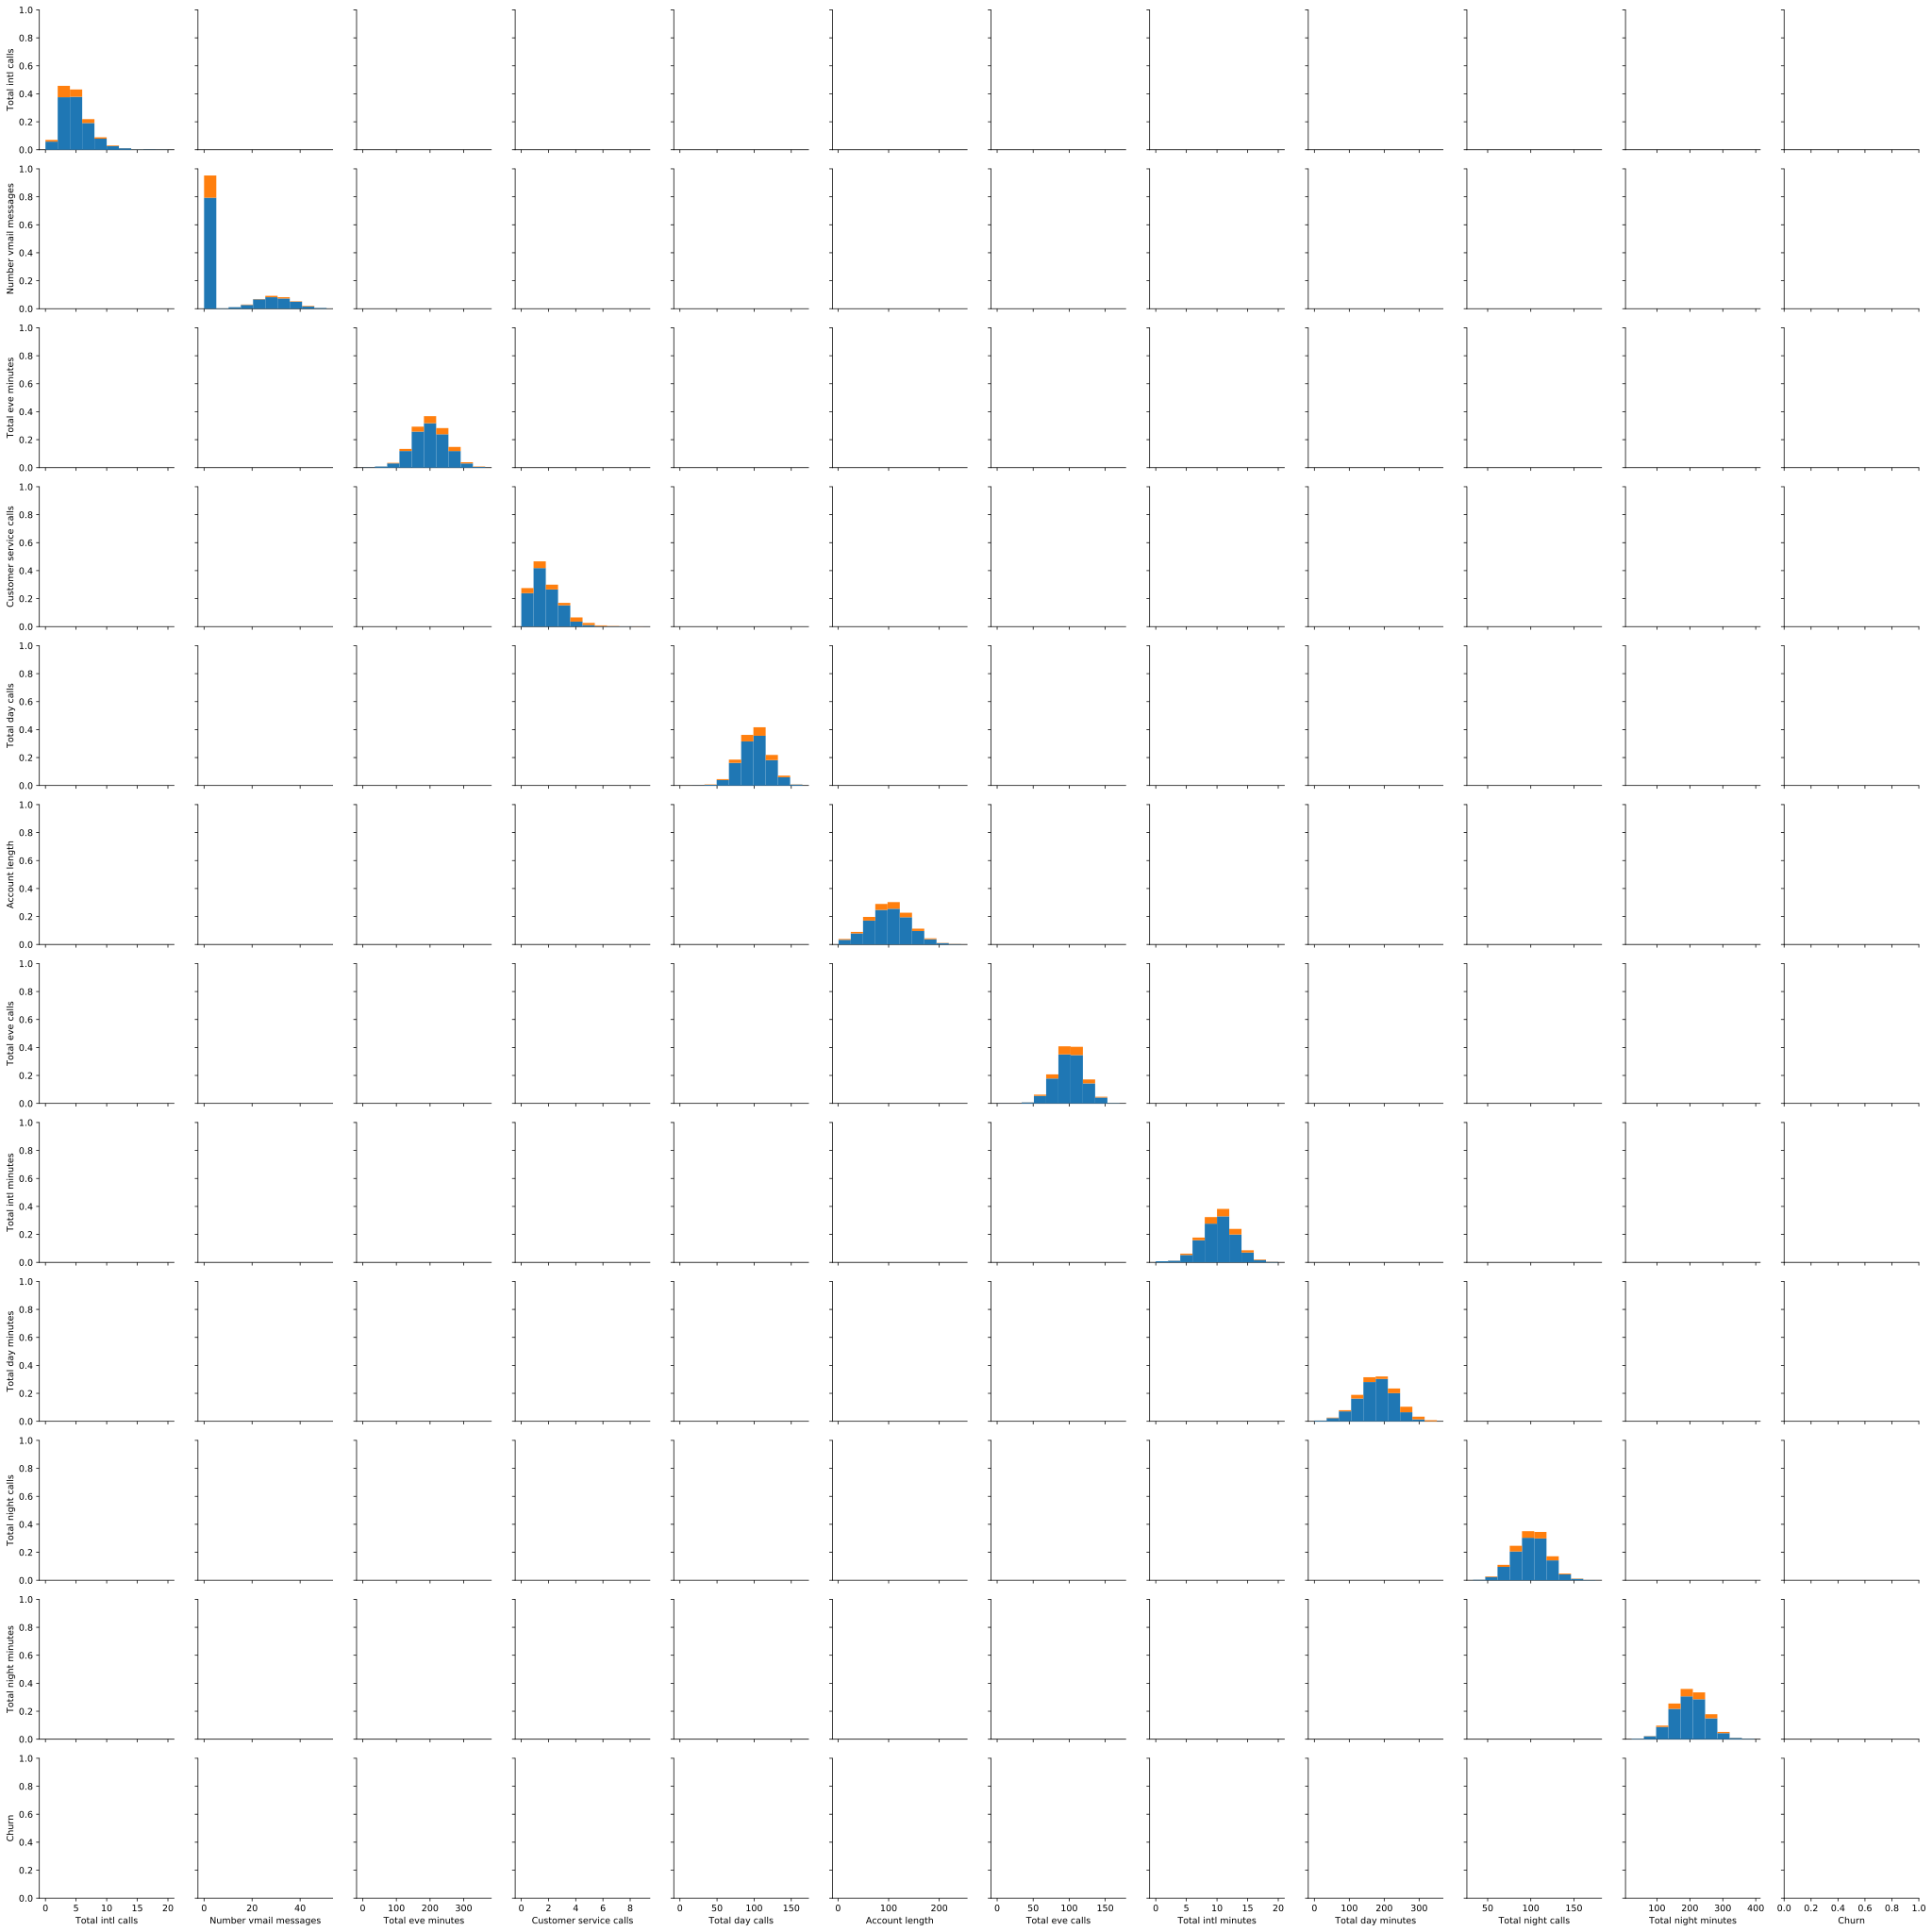

In [90]:
sns.pairplot(df[features + ['Churn']], hue='Churn');

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

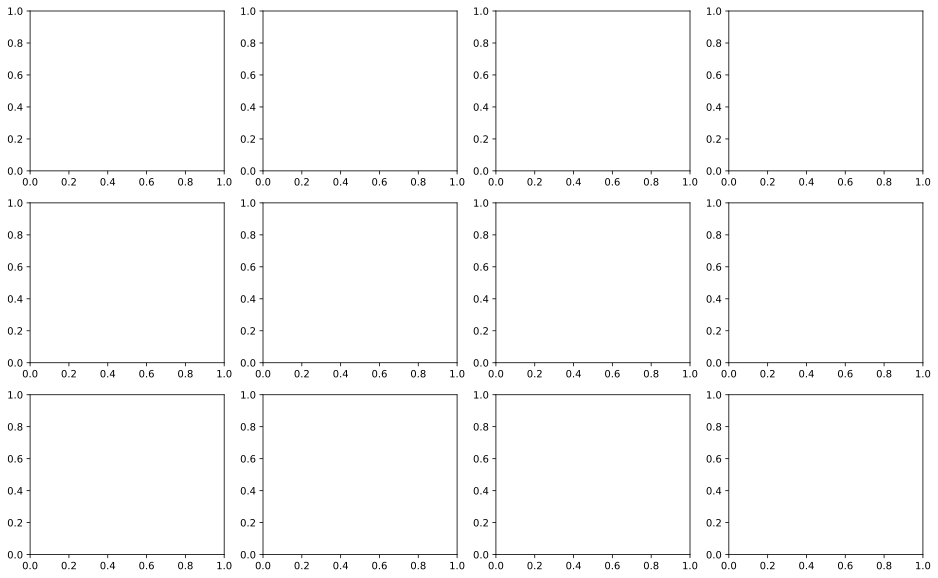

In [94]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features):
    sns.boxplot(x='Churn', y=feat, data=df, ax=axes[idx / 4, idx % 4])
    axes[idx / 4, idx % 4].legend()
    axes[idx / 4, idx % 4].set_xlabel('Churn')
    axes[idx / 4, idx % 4].set_ylabel(feat);


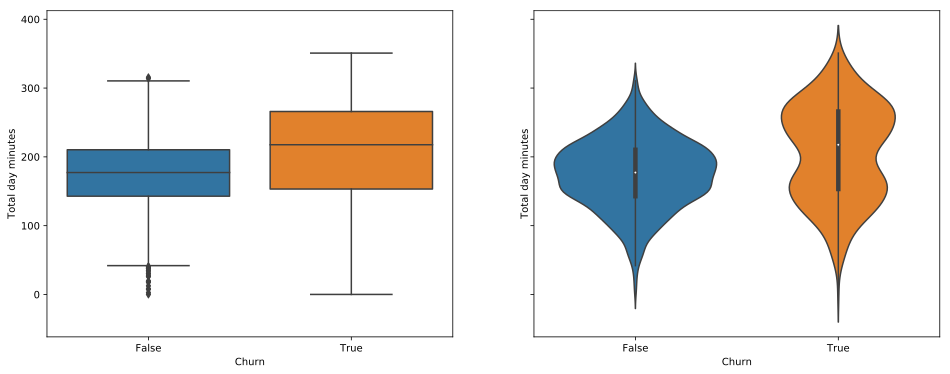

In [96]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))
sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

In [97]:
plt.subplots?

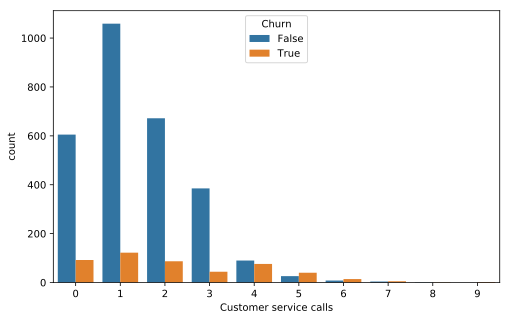

In [98]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);


In [99]:
sns.countplot?

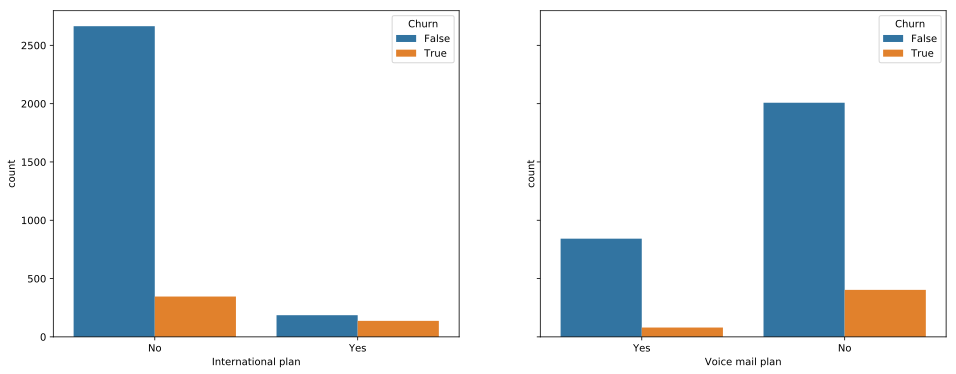

In [100]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

In [102]:
import numpy as np

In [107]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


# Подглядывание в n-мерное пространство с t-SNE

In [108]:
from sklearn.manifold import TSNE


In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
X = df.drop(['Churn', 'State'], axis=1)

In [114]:
X['International plan'] = pd.factorize(X['International plan'])[0]


In [115]:
X['Voice mail plan'] = pd.factorize(X['Voice mail plan'])[0]

In [116]:
scaler = StandardScaler()

In [117]:
X_scaled = scaler.fit_transform(X)

In [118]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

CPU times: user 28.8 s, sys: 2.58 ms, total: 28.8 s
Wall time: 28.8 s


In [119]:
X.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


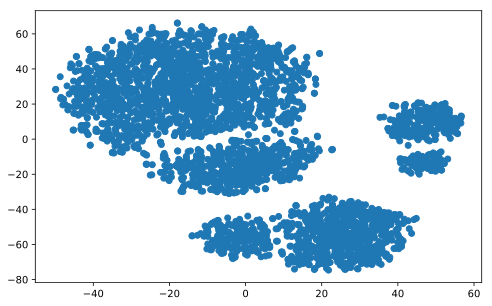

In [120]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

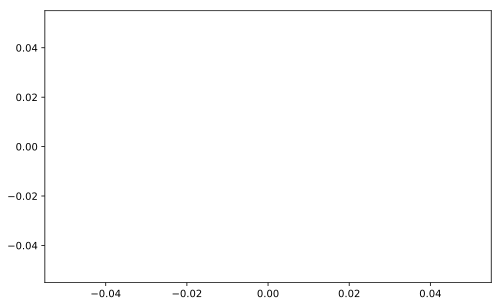

In [126]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
           c = df['Churn'].map({0: 'blue', 1: 'orange'}))

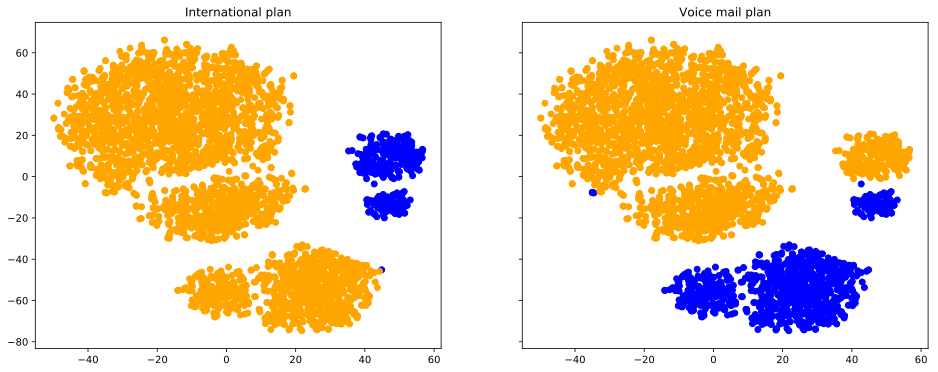

In [127]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

axes[0].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['International plan'].map({'Yes': 'blue', 'No': 'orange'}));
axes[1].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['Voice mail plan'].map({'Yes': 'blue', 'No': 'orange'}));
axes[0].set_title('International plan');
axes[1].set_title('Voice mail plan');